In [1]:
import sys
sys.path.append("rl-trading/")
from StockSimulator import SimpleStock
from RL_Trading import TraderAgent_QLearning, TraderAgent_Random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Run Trials

In [18]:
%%time
trader = TraderAgent_QLearning(stock=SimpleStock, gamma=1, alpha=1)
N_trials = 1000
trials = []

for _ in range(N_trials):
    stock = SimpleStock(transaction_cost=0, random_init=True)
    stock.simulate_trading_day(Ndays=30, trader=trader, print_out=False)
    trials.append(stock)

CPU times: total: 15.3 s
Wall time: 15.3 s


## Analyze Results

In [19]:
total_payoffs = []
for trial in trials:
    total_payoffs.append(np.mean(trial.cashflow_history))
print(np.mean(total_payoffs), np.round(np.min(total_payoffs),3), np.round(np.max(total_payoffs),3))

recent = total_payoffs[-int(0.3*len(total_payoffs)):]
print(np.mean(recent), np.round(np.min(recent),3), np.round(np.max(recent),3))

1.4661263599118994 -1.645 3.794
1.8064506924768124 -1.056 3.658


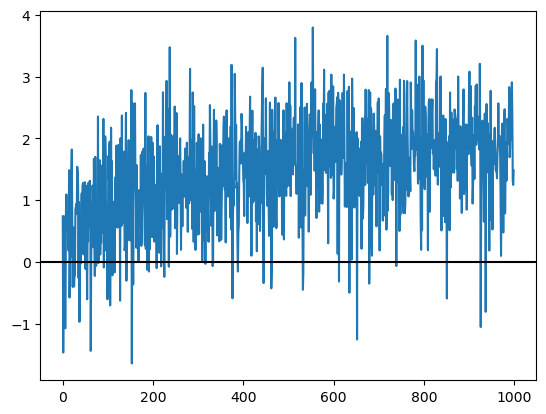

In [20]:
plt.plot(total_payoffs[:])
plt.axhline(y=0, c="black")

### View Single Trial

In [8]:
pos = np.where(np.array(total_payoffs) > int(max(total_payoffs)*0.7))[0]
pos

array([543, 628, 821, 823, 937, 965], dtype=int64)

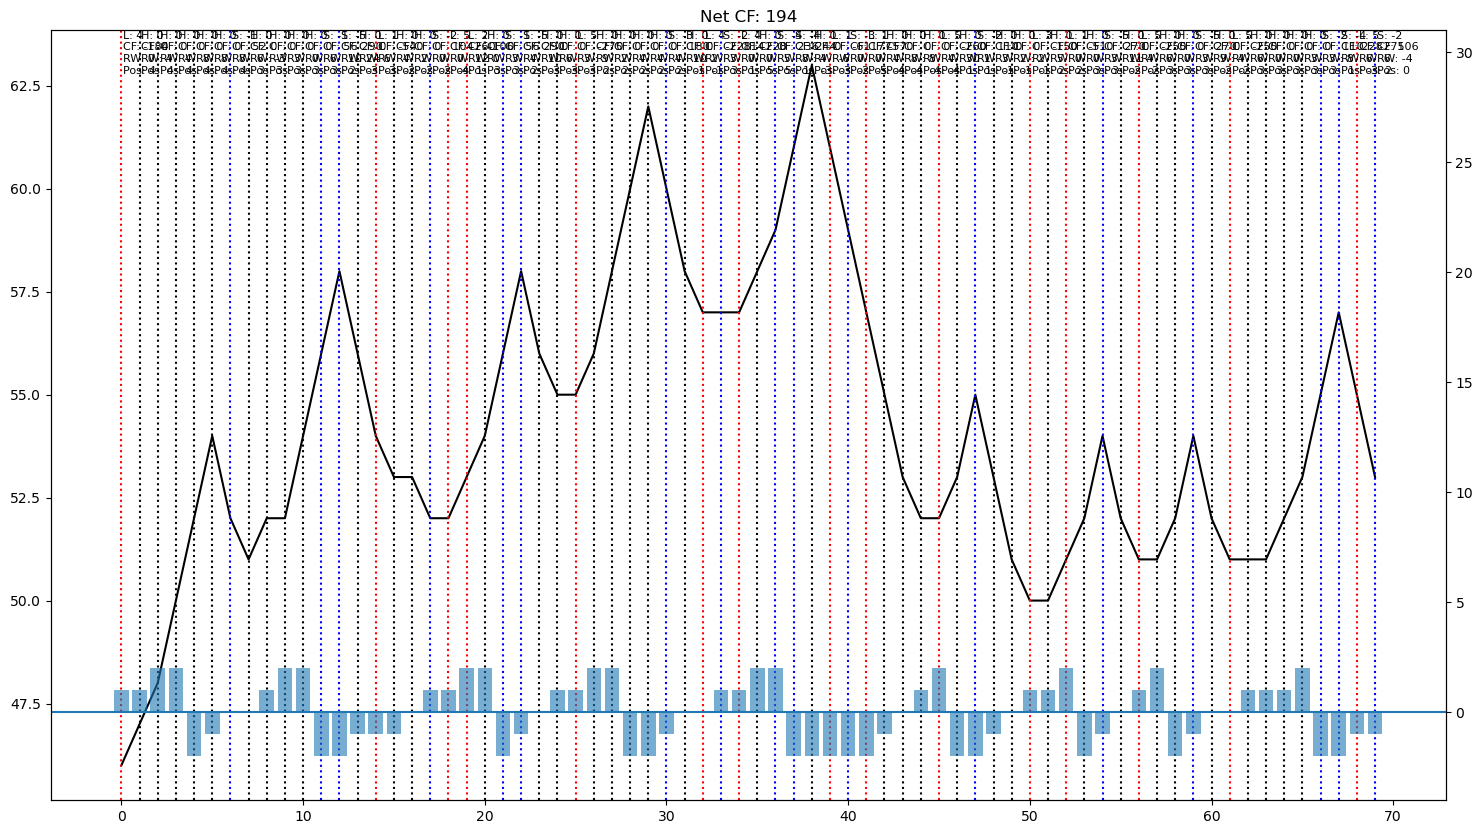

In [10]:
trials[937].plot_history()

In [11]:
view = pd.DataFrame(trader.Q_HAT, 
                    index=pd.MultiIndex.from_tuples(SimpleStock.states, names=["perf.", "price", "pos."]), 
                    columns=SimpleStock.transactions)
view

-5   -4   -3    -2   -1     0    1    2    3    4    5
perf. price pos.                                                         
-2    30    -5    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
            -4    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
            -3    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
            -2    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
            -1    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
...               ...  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...
 2    70     1    0.0  0.0  0.0   0.0  0.0  19.0  0.0  0.0  0.0  0.0  0.0
             2    0.0  0.0  0.0   2.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
             3    0.0  0.0  0.0  14.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
             4    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0
             5    0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0

[2255 rows x 11 columns]

## Random Policy (Benchmark)

In [8]:
%%time
trader2 = TraderAgent_Random(stock=SimpleStock)
N_trials = 1000
trials2 = []

for _ in range(N_trials):
    stock = SimpleStock(transaction_cost=0, random_init=True)
    stock.simulate_trading_day(Ndays=20, trader=trader2, print_out=False)
    trials2.append(stock)

CPU times: total: 5.34 s
Wall time: 5.48 s


In [9]:
total_payoffs = []
for trial in trials2:
    total_payoffs.append(sum(trial.cashflow_history))
print(np.mean(total_payoffs), np.round(np.min(total_payoffs),3), np.round(np.max(total_payoffs),3))

recent = total_payoffs[-int(0.3*len(total_payoffs)):]
print(np.mean(recent), np.round(np.min(recent),3), np.round(np.max(recent),3))

-2.982 -336 357
-2.63 -321 325


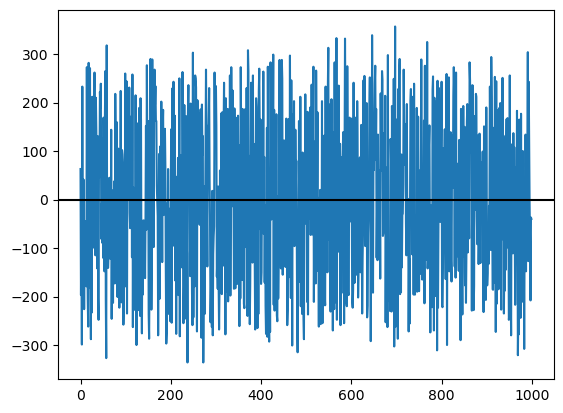

In [10]:
plt.plot(total_payoffs[:])
plt.axhline(y=0, c="black")